##PROJECT - MACHINE LEARNING FOR STOCK MARKET TRADING <br>

### Dataset -  <br> 

1.   S&P stock price history -  https://finance.yahoo.com
2.   Times of india news dataset-  https://bit.ly/36fFPI6 


the purpose of this notebook is to do basic time series analysis to find out if there is any structure in data to exploit and also to do text analysis on news headlines to confirm hypothesis that news/journalist affect stock prices 

Dowload and import necessary libraries and data



In [ ]:
!pip install download #library used to download dataset from internet

In [ ]:
from __future__ import absolute_import , division,print_function , unicode_literals

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime

from download import download

#setting default settings for graphs
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('GSPC.csv')  #dataset crawled from website
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
1,1,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
2,2,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000
3,3,2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000
4,4,2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,2005.550049,6683070000
...,...,...,...,...,...,...,...,...
1478,1478,2021-10-27,4580.220215,4584.569824,4551.660156,4551.680176,4551.680176,3259510000
1479,1479,2021-10-28,4562.839844,4597.549805,4562.839844,4596.419922,4596.419922,3197560000
1480,1480,2021-10-29,4572.870117,4608.080078,4567.589844,4605.379883,4605.379883,3632260000
1481,1481,2021-11-01,4610.620117,4620.339844,4595.060059,4613.669922,4613.669922,2924000000


Checking which Columns are present and dropping unnecessary ones

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
1,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
2,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000
3,2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000
4,2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,2005.550049,6683070000
...,...,...,...,...,...,...,...
1478,2021-10-27,4580.220215,4584.569824,4551.660156,4551.680176,4551.680176,3259510000
1479,2021-10-28,4562.839844,4597.549805,4562.839844,4596.419922,4596.419922,3197560000
1480,2021-10-29,4572.870117,4608.080078,4567.589844,4605.379883,4605.379883,3632260000
1481,2021-11-01,4610.620117,4620.339844,4595.060059,4613.669922,4613.669922,2924000000


###Generate basic statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1483 non-null   object 
 1   Open       1483 non-null   float64
 2   High       1483 non-null   float64
 3   Low        1483 non-null   float64
 4   Close      1483 non-null   float64
 5   Adj Close  1483 non-null   float64
 6   Volume     1483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.2+ KB


###Convert to date column to datetime object and make it as new index<br>
a trick to make things plotting and subsetting easier

In [ ]:
#FIRST STEP - CONVERT INTO TIME-SERIES ORDER - dd/mm/yy - use dtime
def convert_to_date(x):
      return datetime.strptime(x , '%Y %m %d %H')

In [ ]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))  #using lambda function on each value of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1483 non-null   datetime64[ns]
 1   Open       1483 non-null   float64       
 2   High       1483 non-null   float64       
 3   Low        1483 non-null   float64       
 4   Close      1483 non-null   float64       
 5   Adj Close  1483 non-null   float64       
 6   Volume     1483 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 81.2 KB


###Details of the dataset

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1483
Columns  :  7

Features : 
 ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Missing values :   Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Unique values :  
 Date         1483
Open         1469
High         1476
Low          1475
Close        1476
Adj Close    1476
Volume       1482
dtype: int64


### TIME SERIES ANALYSIS OF STOCK PRICES

In [ ]:
df_non_indexed= df.copy() #store original copy
aq_df = df.set_index('Date')  #index as date time - trick!!

In [ ]:
aq_df.index #checking the new index

DatetimeIndex(['2015-12-14', '2015-12-15', '2015-12-16', '2015-12-17',
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-28',
               ...
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-11-01', '2021-11-02'],
              dtype='datetime64[ns]', name='Date', length=1483, freq=None)

In [ ]:
aq_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000
2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000
2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,2005.550049,6683070000


###The reason to make date as index? - Here's why

In [ ]:
aq_df.loc['2015-12-14':'2017-12-18'] #subsetting on the basis of dates

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000
2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000
2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,2005.550049,6683070000
...,...,...,...,...,...,...
2017-12-12,2661.729980,2669.719971,2659.780029,2664.110107,2664.110107,3555680000
2017-12-13,2667.590088,2671.879883,2662.850098,2662.850098,2662.850098,3542370000
2017-12-14,2665.870117,2668.090088,2652.010010,2652.010010,2652.010010,3430030000


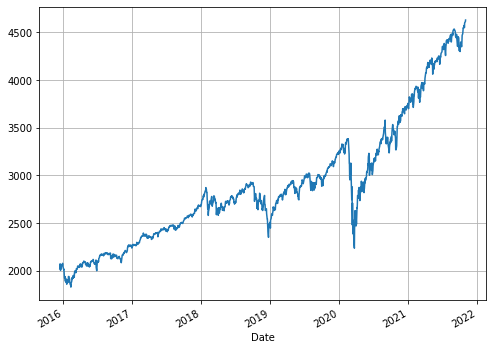

In [ ]:
#plotting is easier - some of the plotting functions take this in plotting curves
#Prices vs time-series 
#our variable of interest - close

aq_df['Close'].plot(grid = True)

### Making interactive plot of closing prices against time

In [ ]:
#using plotly express
import plotly.express as px

fig = px.line(df_non_indexed, x='Date', y='Close', title='Closing prices with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Above curves suggests that

1.   stock market data seems to be very random with peaks and outliers(catastropic events etc)
2.  From basic logic we expect to find minimal to no structure in market.  but let us explore that statistically
3.   has in general increasing trend with some random pits/fall due to some events like the great depression, corona virus etc.
4.   has NO seasonality or cycle

has some random outliers too - would be tough to find structure in this.


UNIVARIATE ANALYSIS OF VARIABLES

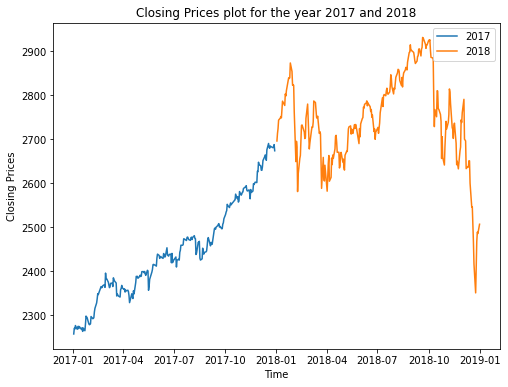

In [ ]:
df_2017= aq_df['2017'].reset_index()
df_2018 = aq_df['2018'].reset_index()

plt.plot(df_2017['Date'], df_2017['Close'])
plt.plot(df_2018['Date'], df_2018['Close'])
plt.legend(['2017', '2018'])
plt.xlabel('Time')
plt.ylabel('Closing Prices')
plt.title('Closing Prices plot for the year 2017 and 2018')

plt.show()

1.  NO seasonality or cyclic nature observed over time- market is relatively random and volatile.
2. So now we will try to capture the trend in time-series and try to see if that is useful.

BIVARIATE/MULTIVARIATE ANALYSIS

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e74b80a50>,
      dtype=object)

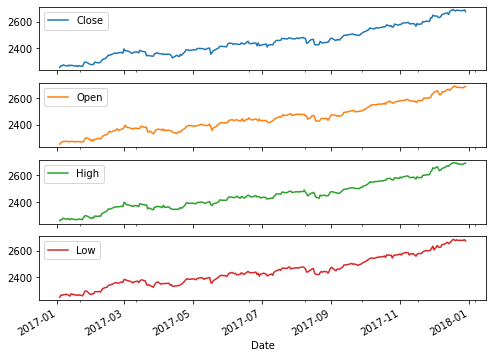

In [ ]:
aq_df_2017=aq_df['2017']
aq_df_2017[['Close','Open','High','Low']].plot(subplots=True)

Note - All variables show almost same trend in all the figures and seem to follow same distribution with minor differences

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e7496b7d0>,
      dtype=object)

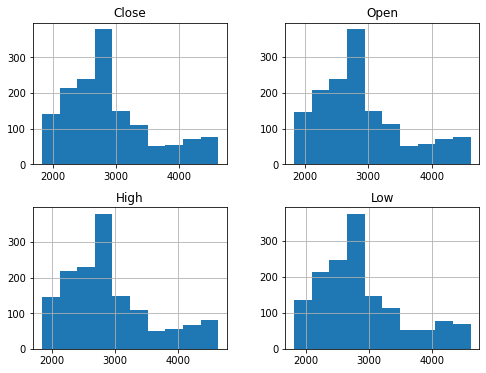

In [ ]:
aq_df[['Close','Open','High','Low']].hist()

Again the same as before suggesting a similar trend in all the variables - suggest an auto-correlation in time-series.

### PAIR PLOT , HEATMAPS AND TREND ANALYSIS

Text(0.5, 0, 'Time')

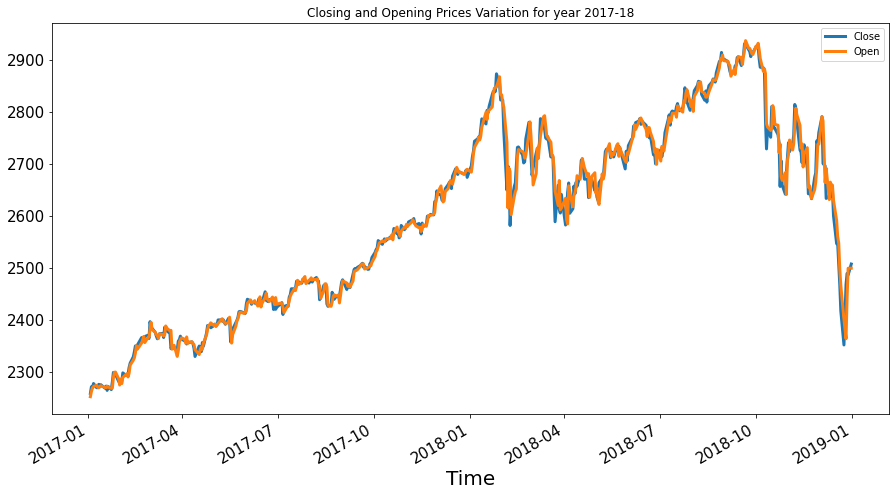

In [ ]:
aq_df['2017':'2018'][['Close','Open']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.title('Closing and Opening Prices Variation for year 2017-18')
plt.xlabel('Time', fontsize=20)

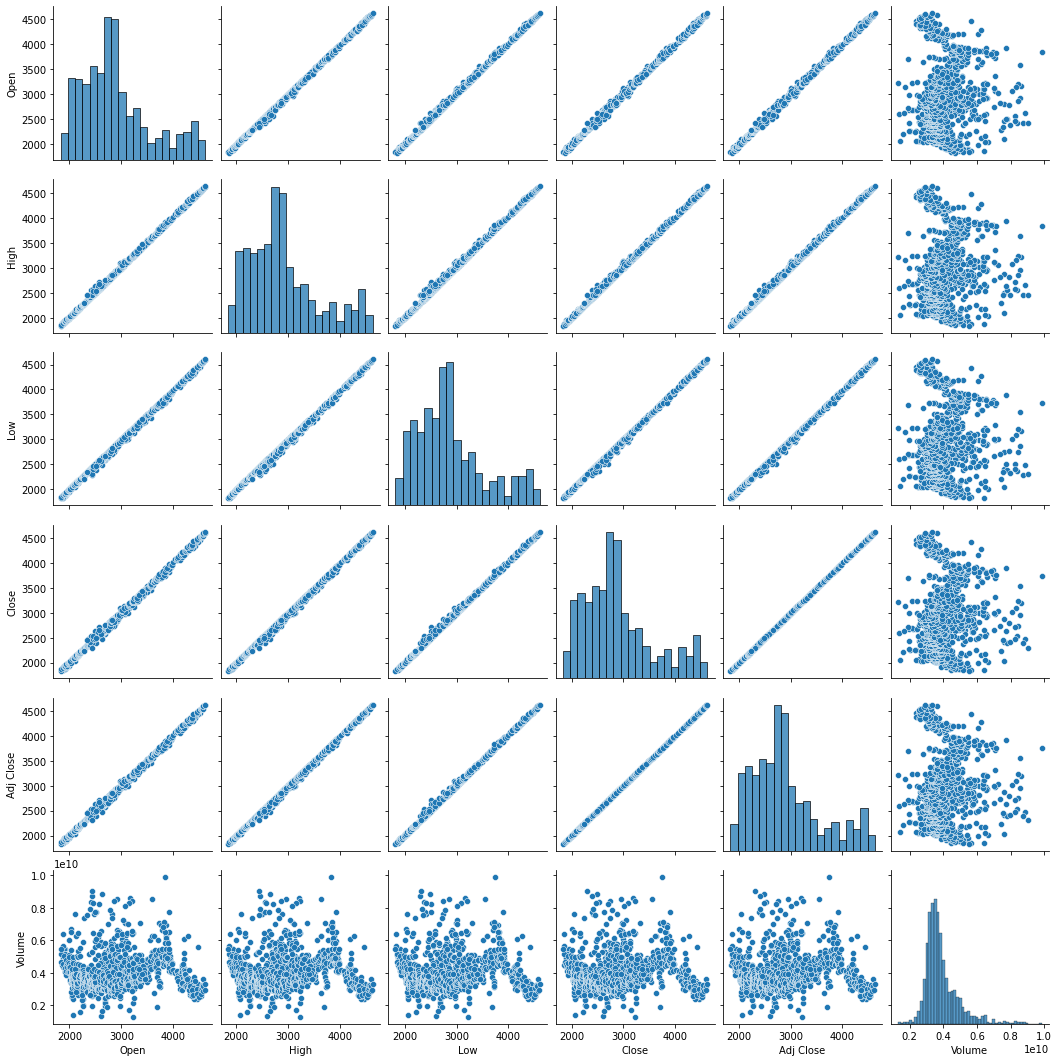

In [ ]:
sns.pairplot(aq_df)
plt.show()

time-series plot suggests a kind of non-stationary time-series with no seasonality or trend 
<br>
from scatter plot many variables seem to be multi-collinear - check correlation to confirm- won't be useful in model

In [ ]:
aq_corr=aq_df.corr(method='pearson')
aq_corr

#notice pearson/spearman correlation is always calculated between two different variab les.

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999728,0.999545,0.999340,0.999340,0.024857
High,0.999728,1.000000,0.999344,0.999604,0.999604,0.033367
Low,0.999545,0.999344,1.000000,0.999650,0.999650,0.009759
Close,0.999340,0.999604,0.999650,1.000000,1.000000,0.020502
Adj Close,0.999340,0.999604,0.999650,1.000000,1.000000,0.020502
Volume,0.024857,0.033367,0.009759,0.020502,0.020502,1.000000


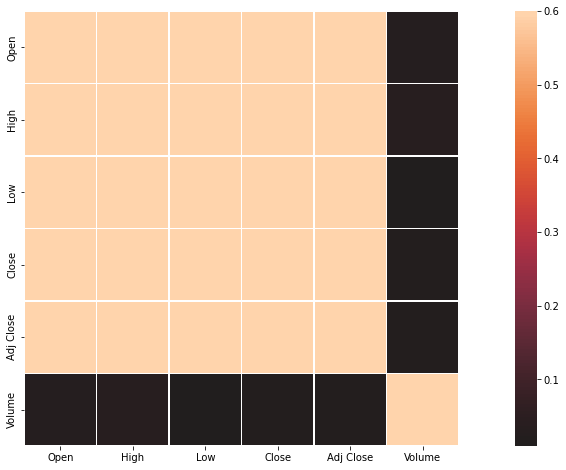

In [ ]:
plt.figure(figsize = (20,8))

sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5)
plt.show()

CHEHCKING FOR NULL VALUES

In [ ]:
df.isnull().sum() #how many and where

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

AUTO-CORRELATION AND PARTIAL AUTO-CORRELATION (ACF AND PACF) AND LAG PLOTS

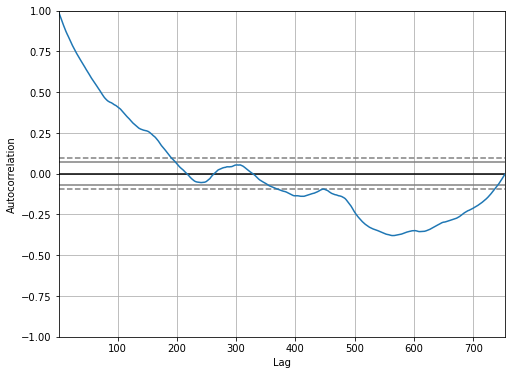

In [ ]:
pd.plotting.autocorrelation_plot(aq_df['2017':'2019']['Close'])

grey and dotted lines show 90% and 95% confidence interval- curve outside suggests there is infact presence of AUTO-CORRELATION- means the previuous values affect CURRENT VALUES

DETERIMING THE STRENGTH OF CORRELATION - LAG PLOTS

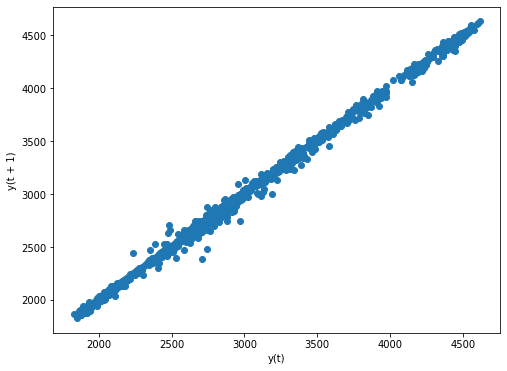

In [ ]:
#first order time lag- between yt and yt-1 since data here is daily- shows a very strong auto-correlation with previous day

pd.plotting.lag_plot(aq_df['Close'],lag=1) 

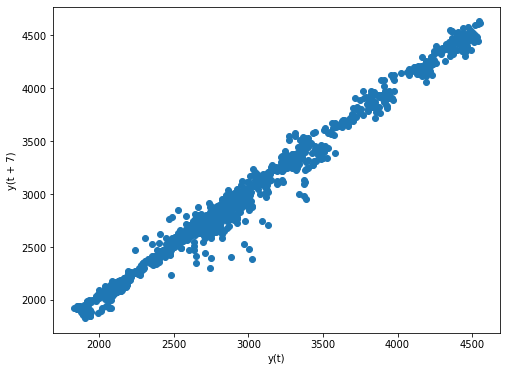

In [ ]:
pd.plotting.lag_plot(aq_df['Close'],lag=7)

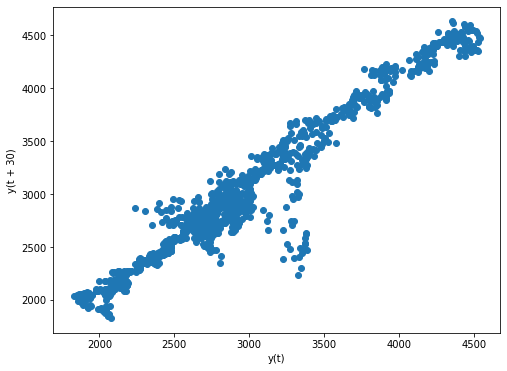

In [ ]:
pd.plotting.lag_plot(aq_df['Close'],lag=30)  #some outliers can be seen clearly but still some correlation

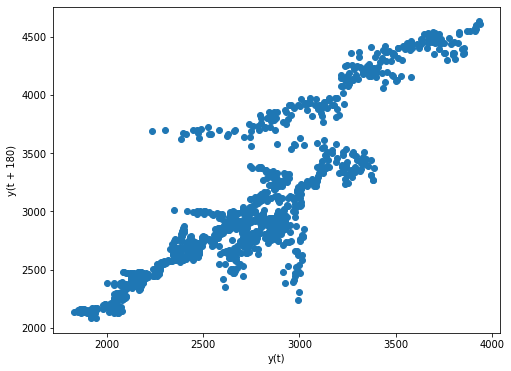

In [ ]:
pd.plotting.lag_plot(aq_df['Close'],lag=180) #change between summer to winter

#now less correlation and too many outliers

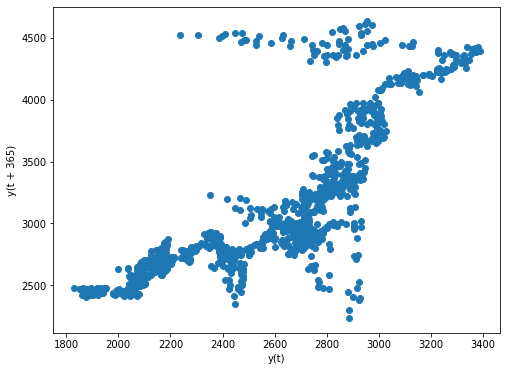

In [ ]:
pd.plotting.lag_plot(aq_df['Close'],lag=365)  #no correlation or very less

The lag plots are plotted with lag of 1 day , 1 week , 1 month, 6 month and one year - since time series data is daily

1.   there is very clear auto-correlation between 1 day time lag data and a weaker one at one week
2.   it gets relatively random at one year

Hence we conclude that stock prices are related to previous history




IS THE TIME SERIES STATIONARY OR NOT? - <br>
KPSS TEST<br>
here the 
null hypothesis - series is stationary <br>
alternate hypothesis - series is non-stationary (what should p-value come out to be then?)

In [ ]:
from statsmodels.tsa.stattools import kpss

stats, p, lags, critical_values = kpss(aq_df['Close'], 'ct')  #doing the test- here ct means there is a data stationary around trend component to it too ,
#if it is no trend then use c

print(f'Test Statistics: {stats}') #our test statistics value
print(f'p-value: {p}') 
print(f'Critial Values: {critical_values}') #lags and the critical value for the test at this lag

if p < 0.05 :
  print('Series is not Stationary') 
else:
  print('Series is Stationary')

#NOTE - since test statistic is 0.17 and at 5% confidence/significance level - 0.146 is less so we are rejecting null

Test Statistics: 0.7646575230284162
p-value: 0.01
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



ADF TEST - NULL HYPOTHESIS EXACTLY OPPOSITE OF KPSS

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(aq_df['Close'])


print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :   #NOTE - failing to reject hte null hence not stationary time-series
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.47454236580230236
p-value: 0.9840784440509803
Critial Values: {'1%': -3.4347972046167983, '5%': -2.863504149938827, '10%': -2.567815693817062}
Series is not Stationary


Since it is not stationary - ARMA , MA Cannot be used , ARIMA / AUTO ARIMA MODEL MAYBE a good fit


DECOMPOSTITION OF TIME SERIES - ADDITIVE AND MULTIPLICATIVE MODEL
<br>
we will choose additive model for current analysis

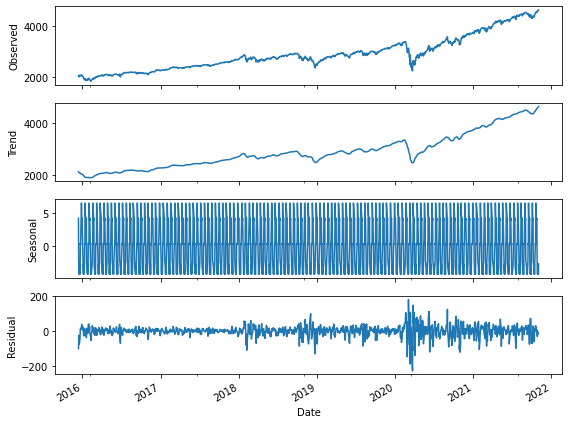

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(aq_df.Close, model='additive' ,freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

VERY CLEARLY SUGGESTS-

1.   Stock Market data is almost a random event
2.   With some trend present but NO SEASONALITY WHATSOEVER

and also residuals seem to be pretty dominant here



Extracting exact components of decomposition

In [ ]:
decomposition.observed 

Date
2015-12-14    2021.939941
2015-12-15    2043.410034
2015-12-16    2073.070068
2015-12-17    2041.890015
2015-12-18    2005.550049
                 ...     
2021-10-27    4551.680176
2021-10-28    4596.419922
2021-10-29    4605.379883
2021-11-01    4613.669922
2021-11-02    4630.649902
Name: Close, Length: 1483, dtype: float64

In [ ]:
decomposition.trend

Date
2015-12-14    2119.788955
2015-12-15    2110.569259
2015-12-16    2101.349564
2015-12-17    2092.129869
2015-12-18    2082.910174
                 ...     
2021-10-27    4586.166503
2021-10-28    4601.967024
2021-10-29    4617.767545
2021-11-01    4633.568067
2021-11-02    4649.368588
Name: Close, Length: 1483, dtype: float64

### CHECKING THE MOVING AVERAGE AND ROLLING STATISTICS

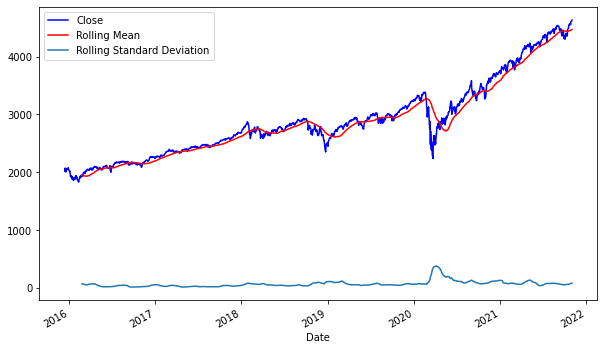

In [ ]:
#Plotting moving average
close = aq_df.Close
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
aq_df.Close.plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

### CHECKING FOR PATTERNS IN RETURNS

Text(0.5, 1.0, 'Returns')

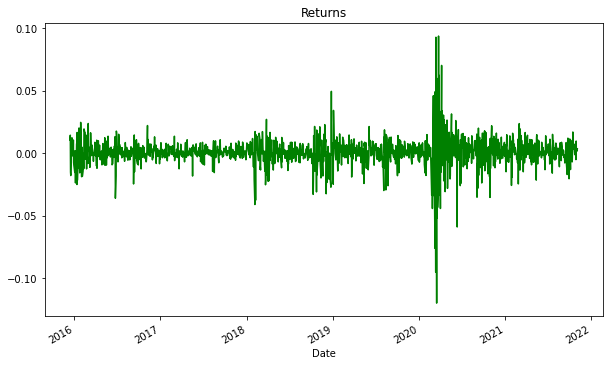

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

### TRAINING THE LOG OF TIME-SERIES - AS DONE IN MULTIPLICATIVE MODELS

In [ ]:
train_log = np.log(aq_df['Close']) 

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 27.6 MB/s 
     |████████████████████████████████| 9.8 MB 29.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
train = aq_df[:1000]
test = aq_df[1000:]
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

### DETERMINING BEST ORDER/ROOTS FOR ARIMA MODEL - AIC SCORE

In [ ]:
#Using auto arima to make predictions using log data

from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6754.596, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6755.337, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6755.399, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6755.564, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6754.658, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6753.760, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6754.963, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6754.655, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6754.610, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.011 seconds


In [ ]:
#Calculating error
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.11721672897603846


### RESULTS - 
#### As we can see the time-series was able to find about 11-15% of structure/accuracy in stock market data


1.   which almost minimal is not bad considering the scale and randomness of the market - it is interesting still about 12% of structure is repeatedly present
2.   **Can be further improved with LSTM and more advanced deep learning techiniques**



Trying detailed stats from ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Close, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1482
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7239.192
Method:                       css-mle   S.D. of innovations             32.002
Date:                Wed, 01 Dec 2021   AIC                          14488.383
Time:                        13:27:04   BIC                          14514.889
Sample:                             1   HQIC                         14498.264
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7619      0.792      2.225      0.026       0.210       3.314
ar.L1.D.Close    -0.1784      0.144     -1.243      0.214      -0.460       0.103
ma.L1.D.Close     0.0020      0.142     

RESIDUAL ANALYSIS - GOODNESS OF TIME SERIES FIT

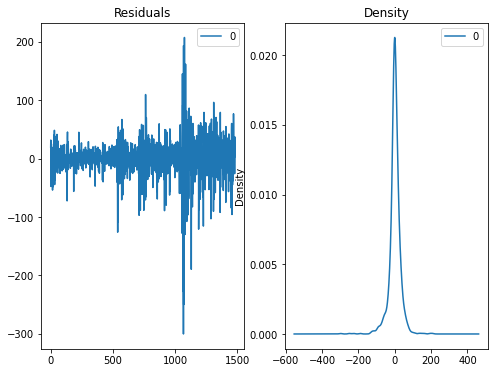

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residual distribution seems to be centred at mean and sharp , Fit seems to be good in this case.

TEXT ANALYSIS OF NEWS HEADLINES

In [ ]:
#uploading file in colab as zip because it is large and extract it

import zipfile
!unzip /content/india-news-headlines.zip

Archive:  /content/india-news-headlines.zip
  inflating: india-news-headlines.csv  


In [ ]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


IMPORT NECESSARY LIBRARIES FOR TEXT-ANALYSIS

In [ ]:
import pandas as pd
import requests
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from bs4 import BeautifulSoup
import re
import nltk

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df_news.columns

Index(['Date', 'Category', 'News'], dtype='object')

In [ ]:
df_news.drop('Category', axis = 1, inplace=True)

### CHECKING STRUCTURE OF DATA AND GROUP TOGETHER SIMILAR VALUES

In [ ]:
print ("Rows     : " ,df_news.shape[0])
print ("Columns  : " ,df_news.shape[1])
print ("\nFeatures : \n" ,df_news.columns.tolist())
print ("\nMissing values :  ", df_news.isnull().any())
print ("\nUnique values :  \n",df_news.nunique())

#some repeated values are present too

Rows     :  3424068
Columns  :  2

Features : 
 ['Date', 'News']

Missing values :   Date    False
News    False
dtype: bool

Unique values :  
 Date       7264
News    3168801
dtype: int64


In [ ]:
#concat all headlines from one day together / drop duplicates / reset index due to groupby function 

df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x))  
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,publish_date,headline_text
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010103,Powerless north India gropes in the dark Think...
3,20010104,The string that pulled Stephen Hawking to Indi...
4,20010105,Light combat craft takes India into club class...
...,...,...
7259,20201227,#BigInterview! Dhritiman Chatterjee: Nobody da...
7260,20201228,Horoscope Today; 28 December 2020: Check astro...
7261,20201229,Man recovers charred remains of 'thief' from h...
7262,20201230,Numerology Readings 30 December 2020: Predicti...


### FUNCTIONS TO CLEAN THE TEXT DATA-
note - we avoid lemmatization because it was slow on our system and was taking too much time

In [ ]:
def tokenize(text):
    text = re.sub(r'[^A-Za-z]',' ',text.lower())
    tokenized_words = word_tokenize(text)
    return tokenized_words


from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmaSentence(token_words):
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(wordnet_lemmatizer.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

CLEANING THE TEXT DATA -

1.   removing the non-alphabet characters and removing punctuation
2.   removing stop words
3. removing derivatives of word- go,going etc - use  stem or lemmatisation



In [ ]:
#text cleaning 
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
c = [] #list containing clean text


for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    #news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    #news=' '.join(news)
    #news = tokenize(df_news['News'][i]) #removing all the non alphabet characters amd tokenizing
    #news = [word for word in news if not word in stopwords.words('english')]
    #news = lemmaSentence(news)
    news=' '.join(news)
    c.append(news)

In [ ]:
df_news['News'] = pd.Series(c)
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,News
0,publish_date,headline text
1,20010102,status quo will not be disturbed at ayodhya sa...
2,20010103,powerless north india gropes in the dark think...
3,20010104,the string that pulled stephen hawking to indi...
4,20010105,light combat craft takes india into club class...
...,...,...
7259,20201227,biginterview dhritiman chatterjee nobody dares...
7260,20201228,horoscope today december check astrological pr...
7261,20201229,man recovers charred remains of thief from his...
7262,20201230,numerology readings december predictions lucky...


EXTRACTING FEATURES FROM CLEANED TEXT - USING NLTK LIBRARY <br>
1. subjectivity
2. polarity
3. sentiment of the text(sentiment analysis) - compound , negative ,positive, neutral

In [ ]:
from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,News,Subjectivity,Polarity
0,publish_date,headline text,0.000000,0.000000
1,20010102,status quo will not be disturbed at ayodhya sa...,0.286859,0.143590
2,20010103,powerless north india gropes in the dark think...,0.392857,0.089286
3,20010104,the string that pulled stephen hawking to indi...,0.445360,0.093039
4,20010105,light combat craft takes india into club class...,0.480553,0.264024
...,...,...,...,...
7259,20201227,biginterview dhritiman chatterjee nobody dares...,0.392082,0.042978
7260,20201228,horoscope today december check astrological pr...,0.409973,0.071405
7261,20201229,man recovers charred remains of thief from his...,0.415684,0.060775
7262,20201230,numerology readings december predictions lucky...,0.436863,0.046930


DISTRIBUTION OF SENTIMENTS

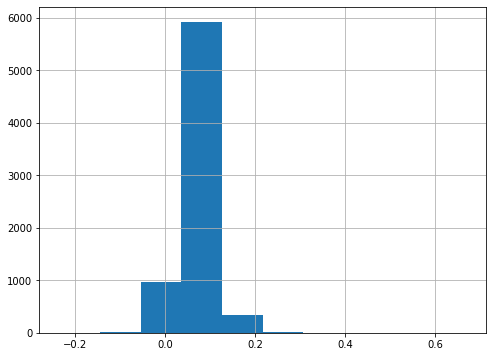

In [ ]:
df_news['Polarity'].hist()

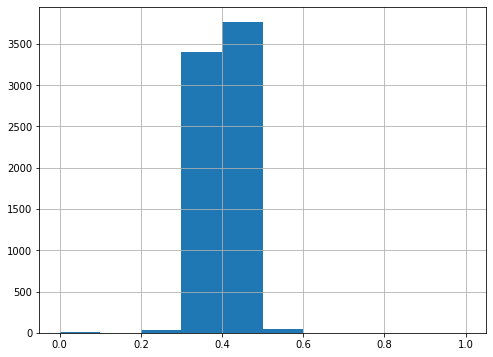

In [ ]:
df_news['Subjectivity'].hist()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value 

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,publish_date,headline text,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,20010102,status quo will not be disturbed at ayodhya sa...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
2,20010103,powerless north india gropes in the dark think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
3,20010104,the string that pulled stephen hawking to indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
4,20010105,light combat craft takes india into club class...,0.480553,0.264024,0.9836,0.137,0.695,0.168
...,...,...,...,...,...,...,...,...
7259,20201227,biginterview dhritiman chatterjee nobody dares...,0.392082,0.042978,-0.9997,0.130,0.789,0.081
7260,20201228,horoscope today december check astrological pr...,0.409973,0.071405,-0.9998,0.146,0.757,0.097
7261,20201229,man recovers charred remains of thief from his...,0.415684,0.060775,-0.9999,0.154,0.751,0.095
7262,20201230,numerology readings december predictions lucky...,0.436863,0.046930,-0.9999,0.146,0.765,0.089


DATAFRAME WITH BOTH TIME-SERIES AND TEXT-ANALYTICS FEATURES

In [ ]:
data_news = df_news.iloc[1: , :].copy()

data_news['Date'] = pd.to_datetime(data_news['Date'],format= '%Y%m%d')
data_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1,2001-01-02,status quo will not be disturbed at ayodhya sa...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
2,2001-01-03,powerless north india gropes in the dark think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
3,2001-01-04,the string that pulled stephen hawking to indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
4,2001-01-05,light combat craft takes india into club class...,0.480553,0.264024,0.9836,0.137,0.695,0.168
5,2001-01-06,light combat craft takes india into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7259,2020-12-27,biginterview dhritiman chatterjee nobody dares...,0.392082,0.042978,-0.9997,0.130,0.789,0.081
7260,2020-12-28,horoscope today december check astrological pr...,0.409973,0.071405,-0.9998,0.146,0.757,0.097
7261,2020-12-29,man recovers charred remains of thief from his...,0.415684,0.060775,-0.9999,0.154,0.751,0.095
7262,2020-12-30,numerology readings december predictions lucky...,0.436863,0.046930,-0.9999,0.146,0.765,0.089


In [ ]:
df_merge = pd.merge(aq_df, data_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000,things men do that make women fall deeper in l...,0.472105,0.100389,-0.9997,0.157,0.717,0.126
1,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000,do looks matter at workplace common running mi...,0.421103,0.074733,-0.9999,0.151,0.743,0.105
2,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000,in pics foods that make you smarter dos and do...,0.434933,0.111113,-0.9110,0.104,0.792,0.105
3,2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000,sex secrets every woman must know you too can ...,0.389598,0.058890,-0.9997,0.149,0.736,0.115
4,2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,2005.550049,6683070000,stop making these diet disasters how to get se...,0.412045,0.071201,-0.9999,0.162,0.727,0.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000,how to set the mood for sex during cold winter...,0.387011,0.053569,-0.9982,0.095,0.834,0.072
1268,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000,horoscope today december check astrological pr...,0.409973,0.071405,-0.9998,0.146,0.757,0.097
1269,2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000,man recovers charred remains of thief from his...,0.415684,0.060775,-0.9999,0.154,0.751,0.095
1270,2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3145200000,numerology readings december predictions lucky...,0.436863,0.046930,-0.9999,0.146,0.765,0.089


### DOING ML WITH TEXT FEATURES
doing regression and try to understand how much variance it explains



In [ ]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021.939941,0.472105,0.100389,-0.9997,0.157,0.717,0.126
1,2043.410034,0.421103,0.074733,-0.9999,0.151,0.743,0.105
2,2073.070068,0.434933,0.111113,-0.9110,0.104,0.792,0.105
3,2041.890015,0.389598,0.058890,-0.9997,0.149,0.736,0.115
4,2005.550049,0.412045,0.071201,-0.9999,0.162,0.727,0.111
...,...,...,...,...,...,...,...
1267,3703.060059,0.387011,0.053569,-0.9982,0.095,0.834,0.072
1268,3735.360107,0.409973,0.071405,-0.9998,0.146,0.757,0.097
1269,3727.040039,0.415684,0.060775,-0.9999,0.154,0.751,0.095
1270,3732.040039,0.436863,0.046930,-0.9999,0.146,0.765,0.089


Scaling of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.100084,1.000000,0.816033,0.000150,0.526316,0.159236,0.770833
1,0.111225,0.639257,0.627130,0.000050,0.481203,0.324841,0.552083
2,0.126617,0.737077,0.894994,0.044507,0.127820,0.636943,0.552083
3,0.110437,0.416426,0.510477,0.000150,0.466165,0.280255,0.656250
4,0.091578,0.575193,0.601125,0.000050,0.563910,0.222930,0.614583


In [ ]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1.000000,0.816033,0.000150,0.526316,0.159236,0.770833
1,0.639257,0.627130,0.000050,0.481203,0.324841,0.552083
2,0.737077,0.894994,0.044507,0.127820,0.636943,0.552083
3,0.416426,0.510477,0.000150,0.466165,0.280255,0.656250
4,0.575193,0.601125,0.000050,0.563910,0.222930,0.614583


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(1017, 6)

LINEAR REGRESSION

In [ ]:
from statsmodels.formula.api import ols

mtmodel = ols("Close ~ Subjectivity+Polarity+Negative+Neutral+Positive+Compound" , data = new_df).fit()
mtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     55.75
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.16e-61
Time:                        14:49:09   Log-Likelihood:                 259.78
No. Observations:                1272   AIC:                            -505.6
Df Residuals:                    1265   BIC:                            -469.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7247      1.812     -0.400      0.689      -4.279       2.830
Subjectivity     0.0013      0.041      0.031      0.975      -0.079       0.081
Polarity         0.0156      0.044      0.359      0.720      -0.070       0.101
Negative         1.0985      1.425      0.771      0.441      -1.698       3.895
Neutral          1.3974      1.684      0.830      0.407      -1.907       4.702
Positive         0.1987      1.032      0.193      0.847      -1.825       2.222
Compound         0.1736      0.063      2.774      0.006       0.051       0.296
==============================================================================
Omnibus:                       11.035   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.151
Skew:                           0.217   Prob(JB):                      0.00379
Kurtosis:                       2.850   Cond. No.                         789.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mtmodel = ols("Close ~ Compound+Polarity" , data = new_df).fit()
mtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     17.62
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.84e-08
Time:                        14:49:09   Log-Likelihood:                 127.97
No. Observations:                1272   AIC:                            -249.9
Df Residuals:                    1269   BIC:                            -234.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5614      0.021     26.328      0.000       0.520       0.603
Compound       0.0144      0.067      0.215      0.830      -0.117       0.145
Polarity      -0.2382      0.040     -5.891      0.000      -0.318      -0.159
==============================================================================
Omnibus:                       40.291   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.028
Skew:                           0.250   Prob(JB):                     8.20e-07
Kurtosis:                       2.473   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OTHER ENSEMBLE AND FOREST MODELS - (NOT TAUGHT IN CLASS)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm 

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.6390732  0.71054228 0.39865478 0.20241719 0.43939902 0.48675213
 0.54537024 0.26549356 0.6567533  0.53021339]
1177    0.809916
1118    0.603371
427     0.316499
351     0.295954
364     0.304096
858     0.521710
1019    0.741452
740     0.421803
461     0.374600
1044    0.777705
Name: Close, dtype: float64
0.03617638359445917


In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[14:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.03484157008959874


RESULT - NEWS HEADLINES AND STOCK MARKET DATA DO SEEM TO BE CORRELATED AND AFFECTING EACH OTHER BUT NOT TOO MUCH OF IT 
<BR>
STOCK MARKET IS PRETTY MUCH STILL A RANDOM THING - 